<a id='intro'></a>
# Определение перспективного тарифа для телеком-компании

Компания «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.</br>
Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. Имеются данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.</br>
**Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше (приносит больше прибыли для компании).**
</br></br>

**ОПИСАНИЕ ТАРИФОВ**

**Тариф «Смарт»**</br>
1.	Ежемесячная плата: 550 рублей</br>
2.	Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика</br>
3.	Стоимость услуг сверх тарифного пакета: 
-	минута разговора: 3 рубля
-	сообщение: 3 рубля
-	1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**</br>
1.	Ежемесячная плата: 1950 рублей</br>
2.	Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика</br>
3.	Стоимость услуг сверх тарифного пакета:
-	минута разговора: 1 рубль
-	сообщение: 1 рубль
-	1 Гб интернет-трафика: 150 рублей

    
***Примечание:***</br> 
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.</br>
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.</br>
Считается, что неиспользованные за предыдущий месяц звонки, смс, интернет на следующий месяц не переносятся.

## Изучение данных из файлов
[В начало](#intro)

In [1]:
# Импортируем библиотеки питона:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats as st

# Изменяем настройки отображения обработки кода в Пандасе, чтобы предупрежедения не выводились:
warnings.filterwarnings("ignore")

# Изменяем настройки отображения столбцов в Пандасе, чтобы выводились все столбцы:
pd.set_option('display.max_columns', None)

In [2]:
# Читаем файлы с исходными данными и преобразуем их в датафрем Питона:
#     указываем путь на локальном компьютере и, как альтернативу, в общедоступной папке в jupiter hub: 
try:
    calls = pd.read_csv("Y:/Обучение цифровой профессии/Аналитик данных/01-04 Статистический анализ данных/calls.csv")
    internet = pd.read_csv("Y:/Обучение цифровой профессии/Аналитик данных/01-04 Статистический анализ данных/internet.csv")
    messages = pd.read_csv("Y:/Обучение цифровой профессии/Аналитик данных/01-04 Статистический анализ данных/messages.csv")
    tariffs = pd.read_csv("Y:/Обучение цифровой профессии/Аналитик данных/01-04 Статистический анализ данных/tariffs.csv")
    users = pd.read_csv("Y:/Обучение цифровой профессии/Аналитик данных/01-04 Статистический анализ данных/users.csv")
except:
    calls = pd.read_csv("/datasets/calls.csv")
    internet = pd.read_csv("/datasets/internet.csv")
    messages = pd.read_csv("/datasets/messages.csv")
    tariffs = pd.read_csv("/datasets/tariffs.csv")
    users = pd.read_csv("/datasets/users.csv")
#     присваиваем имена исходным таблицам:
calls.name = 'calls'
internet.name = 'internet'
messages.name = 'messages'
tariffs.name = 'tariffs'
users.name = 'users'
#     собираем исходный датафрейм:
df = [calls, internet, messages, tariffs, users]
#     изучаем содержимое исходного датафрейма: 
for data in df:
    print("Первые 5 строк датафрейма:", data.name)
    display(data.head())
    print("-----------------------------------------------------------------------------")
    print("Общая информация о датафрейме:", data.name)
    data.info()
    print("-----------------------------------------------------------------------------")
    print("Разброс значений, максимум, минимум, среднее и медиана в столбцах датафрейма:", data.name)
    print(data.describe())
    print("-----------------------------------------------------------------------------")
    print("Количество дубликатов в датафрейме:", data.name)
    print(data.duplicated().sum())
    print("=============================================================================")



Первые 5 строк датафрейма: calls


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


-----------------------------------------------------------------------------
Общая информация о датафрейме: calls
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
-----------------------------------------------------------------------------
Разброс значений, максимум, минимум, среднее и медиана в столбцах датафрейма: calls
            duration        user_id
count  202607.000000  202607.000000
mean        6.755887    1253.940619
std         5.843365     144.722751
min         0.000000    1000.000000
25%         1.300000    1126.000000
50%         6.000000    1260.000000
75%        10.700000    1379.000000
max        38.000

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


-----------------------------------------------------------------------------
Общая информация о датафрейме: internet
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
-----------------------------------------------------------------------------
Разброс значений, максимум, минимум, среднее и медиана в столбцах датафрейма: internet
          Unnamed: 0        mb_used        user_id
count  149396.000000  149396.000000  149396.000000
mean    74697.500000     370.192426    1252.099842
std     43127.054745     278.300951     144.050823
min         0.000000       0.0000

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


-----------------------------------------------------------------------------
Общая информация о датафрейме: messages
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
-----------------------------------------------------------------------------
Разброс значений, максимум, минимум, среднее и медиана в столбцах датафрейма: messages
             user_id
count  123036.000000
mean     1256.989410
std       143.523967
min      1000.000000
25%      1134.000000
50%      1271.000000
75%      1381.000000
max      1499.000000
-----------------------------------------------------------------------------
Количество дубликатов в датафрейме: messages
0
Первые 5 строк датафрейма: t

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


-----------------------------------------------------------------------------
Общая информация о датафрейме: tariffs
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
-----------------------------------------------------------------------------
Разброс значений, максимум, минимум, среднее и медиана в столбцах датафрейма: tariffs
       messages_included  mb_per_month_included  minut

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


-----------------------------------------------------------------------------
Общая информация о датафрейме: users
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
-----------------------------------------------------------------------------
Разброс значений, максимум, минимум, среднее и медиана в столбцах датафрейма: users
           user_id        age
count   500.000000  500.00000
mean   1249.500000   46.58800
std     144.481833   16.66763
min    1000.000000   18.00000
25%    1124.750000

Исходные датафреймы представляют собой таблицы:</br>
- информация о звонках (calls): из 4 столбцов и 202607 строк;</br>
- информация об интернет-сессиях (internet): из 5 столбцов и 149396 строк;</br>
- информация о сообщениях (messages): из 3 столбцов и 123036 строк;</br>
- информация о тарифах (tariffs): из 8 столбцов и 2 строк;</br>
- информация об абонентах (users): из 8 столбцов и 500 строк (считая нулевую).</br>
    
В столбцах используются значения различных типов (строки, вещественные и целые числа).</br>
Для ряда значений автоматически определенный тип неверен (например, даты должны быть в формате дата/время, а не строками).
В таблице с информацией об абонентах имеемся столбец "churn_date" (дата прекращения пользования тарифом) с пропусками данных.</br>
Явных дубликатов в данных не обнаружено.

Требуется предобработка данных.


## Предобработка данных
[В начало](#intro)

Для единообразного отображения названий столбцов переименуем столбец "Unnamed: 0" в "unnamed" таблицы "internet".

Также для однозначной трактовки значений столбцов при дальнейшем исследовании переименуем столбцы:
</br>
- "id" таблиц "calls", "internet" и "messages" в "id_calls", "id_internet" и "id_messages" соответственно; 
- "tariff" таблицы "users" в "tariff_name".

In [3]:
# Переименовываем столбец "Unnamed: 0" в "unnamed" таблицы "internet". При этом изменяем исходный датафрем:
internet.rename(columns = {'Unnamed: 0' : 'unnamed'}, inplace = True)

# Переименовываем остальные столбцы:
calls.rename(columns = {'id' : 'id_calls'}, inplace = True)
internet.rename(columns = {'id' : 'id_internet'}, inplace = True)
messages.rename(columns = {'id' : 'id_messages'}, inplace = True)
users.rename(columns = {'tariff' : 'tariff_name'}, inplace = True)

### Обработка пропусков в данных
[В начало](#intro)</br>

Из описания данных для таблицы **users** (информация о пользователях) следует, что если значение столбца **churn_date**
(дата прекращения пользования тарифом) пропущено, то тариф ещё действовал на момент выгрузки данных.</br>
Поскольку предоставлены данные за 2018 год, то заменяем все пропущенные значения на 31.12.2018.  

In [4]:
# Оценим долю пропущенных значений среди всех данных таблицы users: 
var_a = users['churn_date'].isna().mean()*100
print(f'Доля пропущенных значений о смене тарифа среди всех данных таблицы users {var_a}%.')

# Датафрейм из строк абонентов, которые сменили тарифный план: 
df_users_act = users.copy()
df_users_act['churn_date'] = df_users_act['churn_date'].fillna('act')
df_users_act = df_users_act.query('churn_date != "act"')
#display(df_users_act.head(100))
print('Количество абонентов, сменивших тарифный план в 2018 году:', df_users_act['churn_date'].count())

# Заменяем пропуски в столбце churn_date на значение 2018-12-31:
users['churn_date'] = users['churn_date'].fillna('2018-12-31')

Доля пропущенных значений о смене тарифа среди всех данных таблицы users 92.4%.
Количество абонентов, сменивших тарифный план в 2018 году: 38


### Переопределение типов данных
[В начало](#intro)</br>

Оценивая автоматически определенные типы данных в столбцах таблиц, заключаем, что типы во всех случаях, за исключением
дат, определены верно.</br>
Заменяем типы данных в столбцах с датами с object на datetime64 в:</br>
- таблице calls: в столбце call_date;</br>
- таблице internet: в столбце session_date;</br>
- таблице messages: в столбце message_date;</br>    
- таблице users: в столбце churn_date (с учетом замен всех пропущенных значений на 31.12.2018) и столбце reg_date.</br>

In [5]:
# Переопределяем типы данных в столбцах:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y.%m.%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y.%m.%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y.%m.%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y.%m.%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y.%m.%d')

### Дополнение данных производными параметрами
[В начало](#intro)
    
Посчитаем для каждого пользователя:</br>
- количество сделанных звонков и израсходованных минут разговора по месяцам;</br>
- объем израсходованного интернет-трафика по месяцам;</br>
- количество отправленных сообщений по месяцам;</br>
- помесячную выручку с каждого пользователя (вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану).

In [6]:
# Собираем сводную таблицу об абонентах с помесячной информацией о звонках, интернет-траффику, сообщениям, выручке:

# а) добавляем в таблицы столбцы с номером месяца, в котором происходили конкретный звонок, интернет-соединение или отправка сообщения:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

# б) создаем сводные таблицы для абонентов по месяцам, после чего
#    переименовываем столбцы для однозначной трактовки при дальнейшей аналитике
#    и добавляем столбцы с округленными значениями согласно примечания к описанию тарифов
#    (правила округления звоков и интернет-траффика - из примечания к описанию тарифов): 
# б.1) - по звонкам:
calls['duration_round'] = np.ceil(calls['duration'])
df_calls = calls.pivot_table(index=['user_id', 'month'], values='duration_round', aggfunc={'count', 'sum'}).reset_index()
df_calls.rename(columns = {'count' : 'calls_count', 'sum' : 'calls_sum_round'}, inplace = True)
# б.2) - по интернет-соединениям:
df_internet = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc={'count', 'sum'}).reset_index()
df_internet.rename(columns = {'count' : 'internet_count', 'sum' : 'internet_sum'}, inplace = True)
df_internet['internet_sum'] = df_internet['internet_sum'] / 1024
df_internet['internet_sum_round'] = np.ceil(df_internet['internet_sum'])
# б.3) - по сообщениям:
df_messages = messages.pivot_table(index=['user_id', 'month'], values='message_date', aggfunc={'count'}).reset_index()
df_messages.rename(columns = {'count' : 'messages_count'}, inplace = True)

# в) последовательно объединяем сводные таблицы:
df_synthesis = df_calls.merge(df_internet, on=['user_id', 'month'], how='outer')
df_synthesis = df_synthesis.merge(df_messages, on=['user_id', 'month'], how='outer')
df_synthesis = df_synthesis.merge(users[['user_id', 'churn_date', 'city', 'reg_date', 'tariff_name']], on=['user_id'], how='outer')
df_synthesis = df_synthesis.merge(tariffs, on=['tariff_name'], how='left')
#    и учитываем необходимость оперирования размерностью "Гб" для тарифов:
df_synthesis['mb_per_month_included'] = df_synthesis['mb_per_month_included'] / 1024

# г) подсчитываем прибыль по кажому клиенту согласно тарифного плана:
#    создаем функцию для подсчета прибыли:
def f_profit(row):
    consumption_c = row['calls_sum_round']
    consumption_i = row['internet_sum_round'] 
    consumption_m = row['messages_count']
    base_c = row['minutes_included']
    base_i = row['mb_per_month_included'] 
    base_m = row['messages_included']
    price_base = row['rub_monthly_fee']
    price_c_over = row['rub_per_minute']
    price_i_over = row['rub_per_gb']
    price_m_over = row['rub_per_message']
    if (consumption_c > base_c): profit_c = ((consumption_c - base_c) * price_c_over)
    else: profit_c = 0
    if (consumption_i > base_i): profit_i = ((consumption_i - base_i) * price_i_over)
    else: profit_i = 0
    if (consumption_m > base_m): profit_m = ((consumption_m - base_m) * price_m_over)
    else: profit_m = 0
    profit = price_base + (profit_c + profit_i + profit_m)       
    return profit
#    cоздаем столбец profit с величиной дохода, р. от каждого абонента:
df_synthesis['profit'] = df_synthesis.apply(f_profit, axis=1)

print('Первые и последние 5 строк объединенной сводной таблицы:')
display(df_synthesis)

print('-----------------------------------------------------------------------------------')
print('Уникальные значения номеров месяцев в таблице:')
print(df_synthesis['month'].sort_values().unique())

print('-----------------------------------------------------------------------------------')
print('Строки сводной таблицы, в которых значение для номера месяца не указано:')
df_month_nan = df_synthesis[df_synthesis['month'].isna()]
display(df_month_nan)

Первые и последние 5 строк объединенной сводной таблицы:


,user_id,month,calls_count,calls_sum_round,internet_count,internet_sum,internet_sum_round,messages_count,churn_date,city,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,profit
0,1000,5.0,22.0,159.0,5.0,2.200674,3.0,22.0,2018-12-31,Краснодар,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,1950.0
1,1000,6.0,43.0,172.0,49.0,22.689229,23.0,60.0,2018-12-31,Краснодар,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,1950.0
2,1000,7.0,47.0,340.0,29.0,13.675430,14.0,75.0,2018-12-31,Краснодар,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,1950.0
3,1000,8.0,52.0,408.0,29.0,13.726494,14.0,81.0,2018-12-31,Краснодар,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,1950.0
4,1000,9.0,58.0,466.0,27.0,14.227451,15.0,57.0,2018-12-31,Краснодар,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,10.0,NaN,NaN,63.0,19.101016,20.0,21.0,2018-12-31,Санкт-Петербург,2018-08-15,smart,50,15.0,500,550,200,3,3,1550.0
3212,1489,11.0,NaN,NaN,55.0,17.081602,18.0,20.0,2018-12-31,Санкт-Петербург,2018-08-15,smart,50,15.0,500,550,200,3,3,1150.0
3213,1489,12.0,NaN,NaN,51.0,16.916514,17.0,35.0,2018-12-31,Санкт-Петербург,2018-08-15,smart,50,15.0,500,550,200,3,3,950.0
3214,1128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-23,Волжский,2018-12-15,ultra,1000,30.0,3000,1950,150,1,1,1950.0


-----------------------------------------------------------------------------------
Уникальные значения номеров месяцев в таблице:
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. nan]
-----------------------------------------------------------------------------------
Строки сводной таблицы, в которых значение для номера месяца не указано:


,user_id,month,calls_count,calls_sum_round,internet_count,internet_sum,internet_sum_round,messages_count,churn_date,city,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,profit
3214,1128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-23,Волжский,2018-12-15,ultra,1000,30.0,3000,1950,150,1,1,1950.0
3215,1371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-30,Омск,2018-12-25,smart,50,15.0,500,550,200,3,3,550.0


Для двух абонентов месяц не указан, поскольку в этом же месяце (декабре) была совершена смена тарифа. </br>
Несмотря на отсутствие звонков, пользования интернетом или отправки сообщений, считаем, что для этих абонентов взималась плата базового тарифа за один месяц.

In [7]:
# Заменяем пропуски NaN в столбце month на значение 12 (декабрь):
df_synthesis['month'] = df_synthesis['month'].fillna(12)

# Для удобства интерпретации данных добавляем столбец с названиями месяцев:
#    создаем функцию присваивания названий месяцам:
def f_month_name(row):
    month = row['month']
    if   month ==  1: month_name = 'January'
    elif month ==  2: month_name = 'February'
    elif month ==  3: month_name = 'March'
    elif month ==  4: month_name = 'April'
    elif month ==  5: month_name = 'May'
    elif month ==  6: month_name = 'June'
    elif month ==  7: month_name = 'July'
    elif month ==  8: month_name = 'August'
    elif month ==  9: month_name = 'September'
    elif month == 10: month_name = 'October'
    elif month == 11: month_name = 'November'
    else:             month_name = 'December'
    return month_name
#    создаем функцию перемещения столбца на нужную позицию:
def f_change_column_order(dataframe, column_name, index):
    cols = dataframe.columns.tolist()
    cols.remove(column_name)
    cols.insert(index, column_name)
    return dataframe[cols]
#    добавляем столбец названий месяцев в таблицу после номера месяца:
df_synthesis['month_name'] = df_synthesis.apply(f_month_name, axis=1) 
df_synthesis = f_change_column_order(df_synthesis, 'month_name', 2)

print('Первые и последние 5 строк объединенной сводной таблицы, отсортированной по убыванию дохода от абонента:')
display(df_synthesis.sort_values(by=['profit'], ascending=False))
print(f'Всего после обработки сводная таблица содержит: {df_synthesis.shape[0]} строк и {df_synthesis.shape[1]} столбец.')
print()
# Собираем таблицу для дальнейшего исследования - из обобщенной таблицы оставляем только интересующие столбцы:
all_columns = df_synthesis.columns.values.tolist()  
#print(all_columns)
good_columns = ['user_id', 'month', 'month_name', 'calls_sum_round', 'internet_sum_round', 'messages_count', 'city', 'tariff_name', 'profit']
df_good = df_synthesis[good_columns]
print('Первые и последние 5 строк таблицы для исследовательского анализа данных:')
display(df_good)

Первые и последние 5 строк объединенной сводной таблицы, отсортированной по убыванию дохода от абонента:


,user_id,month,month_name,calls_count,calls_sum_round,internet_count,internet_sum,internet_sum_round,messages_count,churn_date,city,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,profit
3108,1486,12.0,December,133.0,1007.0,118.0,37.648877,38.0,83.0,2018-12-31,Нижний Новгород,2018-10-31,smart,50,15.0,500,550,200,3,3,6770.0
260,1042,12.0,December,121.0,728.0,112.0,36.294619,37.0,75.0,2018-12-31,Хабаровск,2018-11-25,smart,50,15.0,500,550,200,3,3,5709.0
3107,1486,11.0,November,108.0,764.0,109.0,35.416123,36.0,96.0,2018-12-31,Нижний Новгород,2018-10-31,smart,50,15.0,500,550,200,3,3,5680.0
1622,1261,12.0,December,141.0,1074.0,114.0,31.885654,32.0,22.0,2018-12-31,Казань,2018-10-30,smart,50,15.0,500,550,200,3,3,5672.0
1793,1286,12.0,December,95.0,739.0,110.0,34.285225,35.0,68.0,2018-12-31,Москва,2018-11-27,smart,50,15.0,500,550,200,3,3,5321.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,1092,6.0,June,38.0,212.0,31.0,7.785234,8.0,22.0,2018-12-31,Ижевск,2018-06-19,smart,50,15.0,500,550,200,3,3,550.0
2262,1362,12.0,December,54.0,315.0,27.0,7.615449,8.0,10.0,2018-12-31,Владимир,2018-08-02,smart,50,15.0,500,550,200,3,3,550.0
554,1088,11.0,November,56.0,364.0,52.0,14.903291,15.0,37.0,2018-12-31,Казань,2018-06-04,smart,50,15.0,500,550,200,3,3,550.0
552,1088,9.0,September,39.0,277.0,42.0,14.315830,15.0,50.0,2018-12-31,Казань,2018-06-04,smart,50,15.0,500,550,200,3,3,550.0


Всего после обработки сводная таблица содержит: 3216 строк и 21 столбец.

Первые и последние 5 строк таблицы для исследовательского анализа данных:


,user_id,month,month_name,calls_sum_round,internet_sum_round,messages_count,city,tariff_name,profit
0,1000,5.0,May,159.0,3.0,22.0,Краснодар,ultra,1950.0
1,1000,6.0,June,172.0,23.0,60.0,Краснодар,ultra,1950.0
2,1000,7.0,July,340.0,14.0,75.0,Краснодар,ultra,1950.0
3,1000,8.0,August,408.0,14.0,81.0,Краснодар,ultra,1950.0
4,1000,9.0,September,466.0,15.0,57.0,Краснодар,ultra,1950.0
...,...,...,...,...,...,...,...,...,...
3211,1489,10.0,October,NaN,20.0,21.0,Санкт-Петербург,smart,1550.0
3212,1489,11.0,November,NaN,18.0,20.0,Санкт-Петербург,smart,1150.0
3213,1489,12.0,December,NaN,17.0,35.0,Санкт-Петербург,smart,950.0
3214,1128,12.0,December,NaN,NaN,NaN,Волжский,ultra,1950.0


После дополнения интересующими параметрами и выбора интересующих столбцов получили обобщенную таблицу для дальнейшего исследования.

## Исследовательский анализ данных
[В начало](#intro)

Оценим поведение клиентов в зависимости от тарифов и определим, какой из тарифов выгоднее для компании.

### Описание поведения клиентов
[В начало](#intro)

На основе имеющейся выборки: 
- определим, сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц;
- посчитаем среднее количество, дисперсию и стандартное отклонение рассматриваемых параметров;
- построим гистограммы и опишем распределения.

In [8]:
# Таблица распределения уникальных абонентов по тарифам:
abon_count = df_synthesis[['user_id', 'city', 'tariff_name', 'profit']]
abon_count = abon_count.pivot_table(index={'user_id', 'tariff_name', 'city'}, values='profit', aggfunc={'sum', 'mean'}).reset_index()
#abon_count = abon_count.pivot_table(index={'user_id', 'tariff_name', 'city', 'sum', 'mean'}, values='tariff_name').reset_index()
abon_count.groupby('tariff_name')
#abon_count = abon_count.reset_index()
abon_count.rename(columns = {'sum' : 'profit_user_sum', 'mean' : 'profit_user_mean'}, inplace = True)
print('Таблица распределения уникальных абонентов по тарифам:')
display(abon_count)

# Общее количество уникальных абонентов:
abon_count_sum = df_synthesis['user_id'].nunique()
# с тарифом "smart" и "ultra":
abon_count_sum_smart = abon_count.query('tariff_name == "smart"').shape[0]
abon_count_sum_ultra = abon_count.query('tariff_name == "ultra"').shape[0]

print(f'Общее количество уникальных абонентов в доступной для анализа выборке: {abon_count_sum} человек, в том числе:')
print(f'- с тарифом "smart": {abon_count_sum_smart} или ~{round((abon_count_sum_smart / abon_count_sum) * 100)}%,')
print(f'- с тарифом "ultra": {abon_count_sum_ultra} или ~{round(100 - (abon_count_sum_smart / abon_count_sum) * 100)}%.') 

Таблица распределения уникальных абонентов по тарифам:


,tariff_name,city,user_id,profit_user_mean,profit_user_sum
0,smart,Архангельск,1135,1296.583333,15559.0
1,smart,Астрахань,1066,1852.142857,12965.0
2,smart,Астрахань,1280,1320.000000,7920.0
3,smart,Астрахань,1423,966.666667,11600.0
4,smart,Балашиха,1207,856.000000,4280.0
...,...,...,...,...,...
495,ultra,Челябинск,1271,1950.000000,9750.0
496,ultra,Челябинск,1392,1950.000000,15600.0
497,ultra,Челябинск,1491,1950.000000,17550.0
498,ultra,Череповец,1090,1950.000000,5850.0


Общее количество уникальных абонентов в доступной для анализа выборке: 500 человек, в том числе:
- с тарифом "smart": 351 или ~70%,
- с тарифом "ultra": 149 или ~30%.


In [9]:
# Из таблицы для исследовательского анализа данных собираем сводные таблицы сумм и средних значений в зависимости от тарифов
# по месяцам для звонков (c), интернет-трафика (i), сообщений (m) и доходу (p):
#    таблицы с детализацией по абонентам и тарифам:
df_good_smart = df_good.query('tariff_name == "smart"')
df_good_ultra = df_good.query('tariff_name == "ultra"')
#    сводные таблицы сумм и средних значений по месяцам:
df_good_smart_summary_c = df_good_smart.pivot_table(index='month', values='calls_sum_round', aggfunc={'sum', 'mean'}).reset_index()
df_good_smart_summary_i = df_good_smart.pivot_table(index='month', values='internet_sum_round', aggfunc={'sum', 'mean'}).reset_index()
df_good_smart_summary_m = df_good_smart.pivot_table(index='month', values='messages_count', aggfunc={'sum', 'mean'}).reset_index()
df_good_smart_summary_p = df_good_smart.pivot_table(index='month', values='profit', aggfunc={'sum', 'mean'}).reset_index()
df_good_ultra_summary_c = df_good_ultra.pivot_table(index='month', values='calls_sum_round', aggfunc={'sum', 'mean'}).reset_index()
df_good_ultra_summary_i = df_good_ultra.pivot_table(index='month', values='internet_sum_round', aggfunc={'sum', 'mean'}).reset_index()
df_good_ultra_summary_m = df_good_ultra.pivot_table(index='month', values='messages_count', aggfunc={'sum', 'mean'}).reset_index()
df_good_ultra_summary_p = df_good_ultra.pivot_table(index='month', values='profit', aggfunc={'sum', 'mean'}).reset_index()
#    переименование столбцов сводных таблиц сумм и средних значений по месяцам:
df_good_smart_summary_c.rename(columns = {'sum' : 'smart_c_sum', 'mean' : 'smart_c_mean'}, inplace = True)
df_good_smart_summary_i.rename(columns = {'sum' : 'smart_i_sum', 'mean' : 'smart_i_mean'}, inplace = True)
df_good_smart_summary_m.rename(columns = {'sum' : 'smart_m_sum', 'mean' : 'smart_m_mean'}, inplace = True)
df_good_smart_summary_p.rename(columns = {'sum' : 'smart_p_sum', 'mean' : 'smart_p_mean'}, inplace = True)
df_good_ultra_summary_c.rename(columns = {'sum' : 'ultra_c_sum', 'mean' : 'ultra_c_mean'}, inplace = True)
df_good_ultra_summary_i.rename(columns = {'sum' : 'ultra_i_sum', 'mean' : 'ultra_i_mean'}, inplace = True)
df_good_ultra_summary_m.rename(columns = {'sum' : 'ultra_m_sum', 'mean' : 'ultra_m_mean'}, inplace = True)
df_good_ultra_summary_p.rename(columns = {'sum' : 'ultra_p_sum', 'mean' : 'ultra_p_mean'}, inplace = True)
#    обобщенные сводные таблицы из сумм значений по месяцам:
df_good_smart_summary = df_good_smart_summary_c.merge(df_good_smart_summary_i, on=['month'], how='outer')
df_good_smart_summary = df_good_smart_summary.merge(df_good_smart_summary_m, on=['month'], how='outer')
df_good_smart_summary = df_good_smart_summary.merge(df_good_smart_summary_p, on=['month'], how='outer')
df_good_ultra_summary = df_good_ultra_summary_c.merge(df_good_ultra_summary_i, on=['month'], how='outer')
df_good_ultra_summary = df_good_ultra_summary.merge(df_good_ultra_summary_m, on=['month'], how='outer')
df_good_ultra_summary = df_good_ultra_summary.merge(df_good_ultra_summary_p, on=['month'], how='outer')
#    итоговая обобщенная сводная таблица из сумм и средних значений по месяцам по тарифам:
df_good_stat = df_good_smart_summary.merge(df_good_ultra_summary, on=['month'], how='outer')
#    добавляем столбец названий месяцев в таблицу после номера месяца:
df_good_stat['month_name'] = df_good_stat.apply(f_month_name, axis=1) 
df_good_stat = f_change_column_order(df_good_stat, 'month_name', 1)
#    создаем функцию для подсчета отношения сумм значений параметров тарифов smart и ultra (ratio = smart / ultra)
#    по месяцам для звонков (c), интернет-трафика (i), сообщений (m) и доходу (p): 
def f_ratio(row):
    smart_c = row['smart_c_sum']
    ultra_c = row['ultra_c_sum']
    smart_i = row['smart_i_sum']
    ultra_i = row['ultra_i_sum']
    smart_m = row['smart_m_sum']
    ultra_m = row['ultra_m_sum']
    smart_p = row['smart_p_sum']
    ultra_p = row['ultra_p_sum']
    try: ratio_c = smart_c / ultra_c 
    except ZeroDivisionError: ratio_c = "-"
    try: ratio_i = smart_i / ultra_i
    except ZeroDivisionError: ratio_i = "-"
    try: ratio_m = smart_m / ultra_m
    except ZeroDivisionError: ratio_m = "-"
    try: ratio_p = smart_p / ultra_p
    except ZeroDivisionError: ratio_p = "-"
    return pd.Series([ratio_c, ratio_i, ratio_m, ratio_p])
#    добавляем отношения параметров в обобщенную сводную таблицу:
df_good_stat[['ratio_c', 'ratio_i', 'ratio_m', 'ratio_p']] = df_good_stat.apply(f_ratio, axis=1)
#    делаем индексами строк названия месяцев, отсортированных от начала до конца года:
df_good_stat = df_good_stat.pivot_table(index='month_name').sort_values('month')
#    итоговая обобщенная сводная таблица из сумм и средних значений по месяцам
#    со столбцами отношений значений параметров между тарифами:
print('Таблица из сумм и средних значений по месяцам в зависимости от тарифов "smart" и "ultra" \nдля звонков (c), интернет-соединений (i), сообщений (m), дохода (p) и соотношений smart/ultra для сумм (ratio):')
display(df_good_stat)

Таблица из сумм и средних значений по месяцам в зависимости от тарифов "smart" и "ultra" 
для звонков (c), интернет-соединений (i), сообщений (m), дохода (p) и соотношений smart/ultra для сумм (ratio):


,month,ratio_c,ratio_i,ratio_m,ratio_p,smart_c_mean,smart_c_sum,smart_i_mean,smart_i_sum,smart_m_mean,smart_m_sum,smart_p_mean,smart_p_sum,ultra_c_mean,ultra_c_sum,ultra_i_mean,ultra_i_sum,ultra_m_mean,ultra_m_sum,ultra_p_mean,ultra_p_sum
month_name,,,,,,,,,,,,,,,,,,,,,
January,1.0,1.798858,2.495798,2.039474,1.397436,203.852941,6931.0,8.735294,297.0,20.000000,620.0,721.323529,24525.0,428.111111,3853.0,13.222222,119.0,43.428571,304.0,1950.000000,17550.0
February,2.0,2.429393,2.385417,2.650854,1.012679,298.689655,17324.0,11.844828,687.0,27.940000,1397.0,827.603448,48001.0,297.125000,7131.0,13.090909,288.0,32.937500,527.0,1975.000000,47400.0
March,3.0,1.657780,1.796325,2.052720,1.202897,390.051948,30034.0,15.233766,1173.0,35.550725,2453.0,1164.623377,89676.0,489.648649,18117.0,17.648649,653.0,47.800000,1195.0,2014.864865,74550.0
April,4.0,1.632289,1.635584,1.983295,0.979709,367.133929,41119.0,13.625000,1526.0,35.864583,3443.0,963.089286,107866.0,475.301887,25191.0,16.963636,933.0,44.512821,1736.0,2001.818182,110100.0
May,5.0,1.597391,1.728043,1.877760,1.223543,387.361702,54618.0,15.907801,2243.0,39.032787,4762.0,1197.510638,168849.0,534.250000,34192.0,19.666667,1298.0,48.769231,2536.0,2059.701493,138000.0
June,6.0,1.610249,1.644249,1.562910,1.152709,398.067485,64885.0,15.951220,2616.0,38.577465,5478.0,1204.018293,197459.0,497.469136,40295.0,19.168675,1591.0,52.313433,3505.0,2039.285714,171300.0
July,7.0,1.652586,1.710075,1.495591,1.276337,408.353234,82079.0,15.875622,3191.0,38.988506,6784.0,1223.950249,246014.0,564.397727,49667.0,20.733333,1866.0,62.136986,4536.0,2118.131868,192750.0
August,8.0,1.812252,1.875536,1.525178,1.392284,423.269231,99045.0,16.807692,3933.0,38.750000,7905.0,1320.595745,310340.0,530.611650,54653.0,19.783019,2097.0,58.897727,5183.0,2083.177570,222900.0
September,9.0,1.796360,1.925892,1.454515,1.395988,430.266409,111439.0,16.392308,4262.0,39.219731,8746.0,1249.946154,324986.0,558.882883,62036.0,19.412281,2213.0,63.294737,6013.0,2024.347826,232800.0


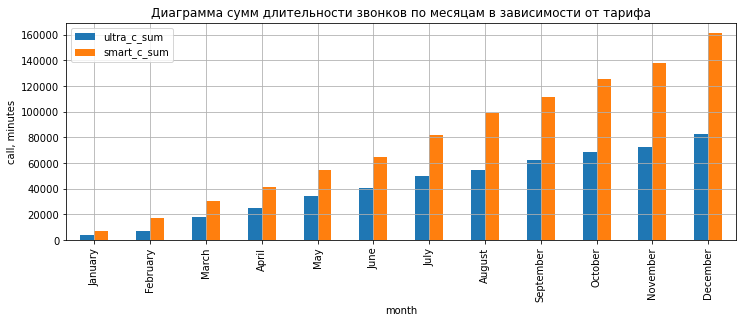

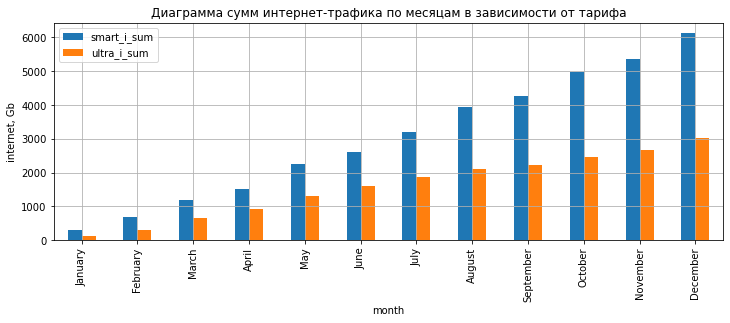

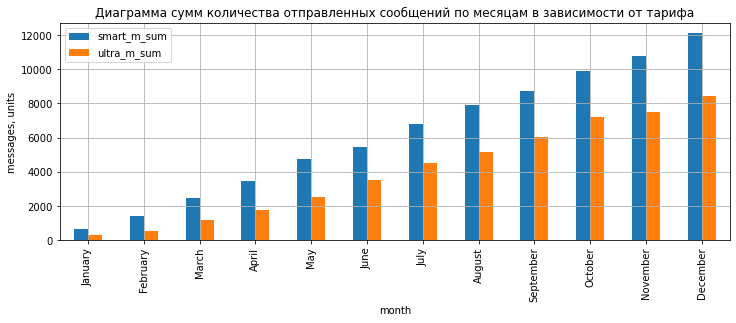

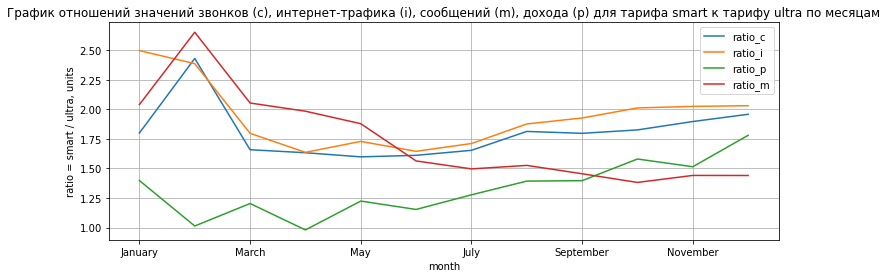

In [10]:
# Диаграмма сумм длительности звонков по месяцам в зависимости от тарифа:
df_good_stat.plot(kind='bar',
                  y={'smart_c_sum', 'ultra_c_sum'},
                  xlabel='month',
                  ylabel='call, minutes',
                  figsize=(12, 4),
                  grid=True)                 
plt.title('Диаграмма сумм длительности звонков по месяцам в зависимости от тарифа')
plt.show()

# Диаграмма сумм интернет-трафика по месяцам в зависимости от тарифа:
df_good_stat.plot(kind='bar',
                  y={'smart_i_sum', 'ultra_i_sum'},
                  xlabel='month',
                  ylabel='internet, Gb',
                  figsize=(12, 4),
                  grid=True)
plt.title('Диаграмма сумм интернет-трафика по месяцам в зависимости от тарифа')
plt.show()

# Диаграмма сумм количества отправленных сообщений по месяцам в зависимости от тарифа:
df_good_stat.plot(kind='bar',
                  y={'smart_m_sum', 'ultra_m_sum'},
                  xlabel='month',
                  ylabel='messages, units',
                  figsize=(12, 4),
                  grid=True)
plt.title('Диаграмма сумм количества отправленных сообщений по месяцам в зависимости от тарифа')
plt.show()

# График отношений значений звонков (c), интернет-трафика (i), сообщений (m), дохода (p) 
# для тарифа smart к тарифу ultra по месяцам:
df_good_stat.plot(y={'ratio_c', 'ratio_i', 'ratio_m', 'ratio_p'},
                  xlabel='month',
                  ylabel='ratio = smart / ultra, units',
                  figsize=(12, 4),
                  grid=True)
plt.title('График отношений значений звонков (c), интернет-трафика (i), сообщений (m), дохода (p) для тарифа smart к тарифу ultra по месяцам')
plt.show()

Из полученной таблицы и диаграмм видим, что **с каждым месяцем продолжительность звонков, количество интернет-траффика и число отправленных сообщений для обоих рассматриваемых тарифов растет.**</br>
В начале года продолжительность звонков, объем интернет-траффика и количество отправленных сообщений по тарифу "smart" были более чем в 2 раза больше, чем по тарифу "ultra". В весенние и летние месяцы превышение объемов тарифа "smart" над тарифом "ultra" несколько выровнялось (в июне соотношения параметров были в коридоре 1,50...1,75). Осенью и зимой это соотношение по звонкам и интернету стабилизировались возле 2, в то время как сообщения абоненты тарифа "smart" стали отправлять реже, чем в предыдущие месяцы (соотношение "smart" / "ultra" чуть ниже 1,5).</br>  

**Прибыль от абонентов тарифа "smart" практически на протяжении всего года была больше, чем от абонентов тарифа "ultra"**, за исключением февраля (практически одинаковые значения) и апреля, когда абоненты тарифа "ultra" принесли больше дохода компании.</br>  
**С мая и по декабрь заметна тенденция устойчивого опережения роста прибыли от абонентов тарифа "smart" над прибылью от абонентов тарифа "ultra".** Тем не менее, **делать на данном этапе вывод, что тариф "smart" прибыльнее для компании нельзя, поскольку общее количество уникальных абонентов в доступной для анализа выборке (500 человек) распределено по тарифам неравномерно**, а именно:
- с тарифом "smart": 351 или ~70%,
- с тарифом "ultra": 149 или ~30%.


In [11]:
# Вычисляем для средних значений звонков (c), интернет-трафика (i), сообщений (m) и дохода (p)
# итоговой обобщенной сводной таблицы средние значения, дисперсии и стандартные отклонения в зависимости от тарифов 
# (учитываем, что датасет — не вся совокупность, а выборка из неё, поэтому вместо дисперсии и стандартного отклонения
# считаем их оценки по имеющейся выборке. Для этого в методе var() и std() указываем параметр ddof=1):
#    средние значения:
smart_mean_c = df_good_stat['smart_c_mean'].mean()
smart_mean_i = df_good_stat['smart_i_mean'].mean()
smart_mean_m = df_good_stat['smart_m_mean'].mean()
smart_mean_p = df_good_stat['smart_p_mean'].mean()
ultra_mean_c = df_good_stat['ultra_c_mean'].mean()
ultra_mean_i = df_good_stat['ultra_i_mean'].mean()
ultra_mean_m = df_good_stat['ultra_m_mean'].mean()
ultra_mean_p = df_good_stat['ultra_p_mean'].mean()
#    дисперсии:
smart_variance_estimate_c = np.var(df_good_stat['smart_c_mean'], ddof=1)
smart_variance_estimate_i = np.var(df_good_stat['smart_i_mean'], ddof=1)
smart_variance_estimate_m = np.var(df_good_stat['smart_m_mean'], ddof=1)
smart_variance_estimate_p = np.var(df_good_stat['smart_p_mean'], ddof=1)
ultra_variance_estimate_c = np.var(df_good_stat['ultra_c_mean'], ddof=1)
ultra_variance_estimate_i = np.var(df_good_stat['ultra_i_mean'], ddof=1)
ultra_variance_estimate_m = np.var(df_good_stat['ultra_m_mean'], ddof=1)
ultra_variance_estimate_p = np.var(df_good_stat['ultra_p_mean'], ddof=1)
#    стандартные отклтонения:
smart_standard_deviation_c = np.std(df_good_stat['smart_c_mean'], ddof=1)
smart_standard_deviation_i = np.std(df_good_stat['smart_i_mean'], ddof=1)
smart_standard_deviation_m = np.std(df_good_stat['smart_m_mean'], ddof=1)
smart_standard_deviation_p = np.std(df_good_stat['smart_p_mean'], ddof=1)
ultra_standard_deviation_c = np.std(df_good_stat['ultra_c_mean'], ddof=1)
ultra_standard_deviation_i = np.std(df_good_stat['ultra_i_mean'], ddof=1)
ultra_standard_deviation_m = np.std(df_good_stat['ultra_m_mean'], ddof=1)
ultra_standard_deviation_p = np.std(df_good_stat['ultra_p_mean'], ddof=1)

# Cобираем полученные статистические параметры в таблицу в зависимости от тарифов: 
#    данные в столбцах:
stat_names = ['mean', 'variance_estimate', 'standard_deviation']
stat_smart_c = [smart_mean_c, smart_variance_estimate_c, smart_standard_deviation_c]
stat_smart_i = [smart_mean_i, smart_variance_estimate_i, smart_standard_deviation_i]
stat_smart_m = [smart_mean_m, smart_variance_estimate_m, smart_standard_deviation_m]
stat_smart_p = [smart_mean_p, smart_variance_estimate_p, smart_standard_deviation_p]
stat_ultra_c = [ultra_mean_c, ultra_variance_estimate_c, ultra_standard_deviation_c]
stat_ultra_i = [ultra_mean_i, ultra_variance_estimate_i, ultra_standard_deviation_i]
stat_ultra_m = [ultra_mean_m, ultra_variance_estimate_m, ultra_standard_deviation_m]
stat_ultra_p = [ultra_mean_p, ultra_variance_estimate_p, ultra_standard_deviation_p]
#    создаем словарь списков и датафрейм со статистическими параметрами:
stat_dic = ({'stat_param':stat_names,
             'smart_c':stat_smart_c, 'ultra_c':stat_ultra_c,
             'smart_i':stat_smart_i, 'ultra_i':stat_ultra_i,
             'smart_m':stat_smart_m, 'ultra_m':stat_ultra_m,
             'smart_p':stat_smart_p, 'ultra_p':stat_ultra_p,
            })
df_stat = pd.DataFrame(stat_dic)
print('Таблица из статистических (усредненных средних) параметров: \nсреднее (mean), дисперсия (variance_estimate), стандартное отклонение (standard_deviation)\nв зависимости от тарифов (smart или ultra) для звонков (с), интернет-трафика (i), сообщений (m) и прибыли (р):')
display(df_stat)

Таблица из статистических (усредненных средних) параметров: 
среднее (mean), дисперсия (variance_estimate), стандартное отклонение (standard_deviation)
в зависимости от тарифов (smart или ultra) для звонков (с), интернет-трафика (i), сообщений (m) и прибыли (р):


,stat_param,smart_c,ultra_c,smart_i,ultra_i,smart_m,ultra_m,smart_p,ultra_p
0,mean,387.605810,511.234714,15.204689,18.481028,36.262730,55.169629,1179.670841,2046.820446
1,variance_estimate,5296.895977,7185.123008,6.921404,7.829686,38.806685,145.024587,56953.987059,3214.064417
2,standard_deviation,72.779777,84.765105,2.630856,2.798158,6.229501,12.042615,238.650345,56.692719


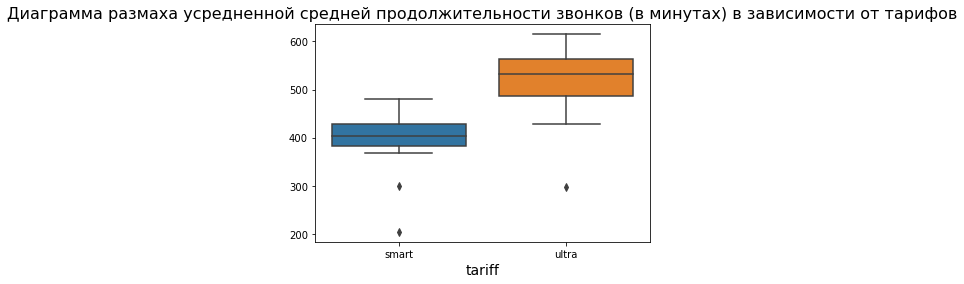

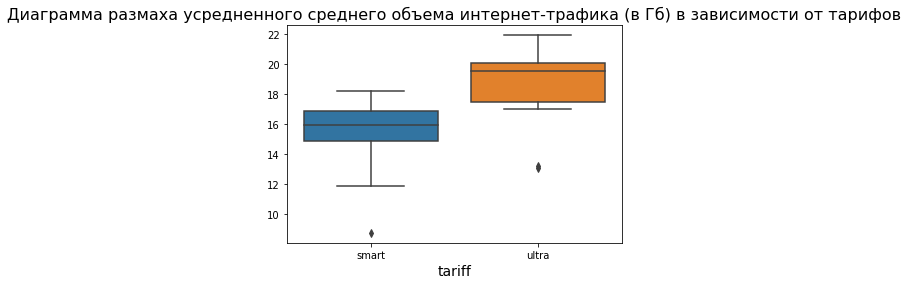

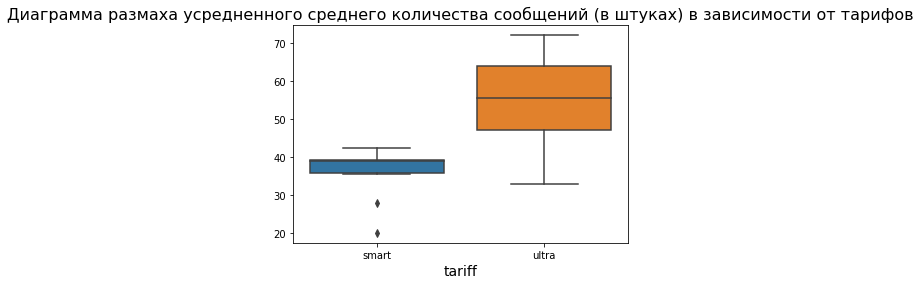

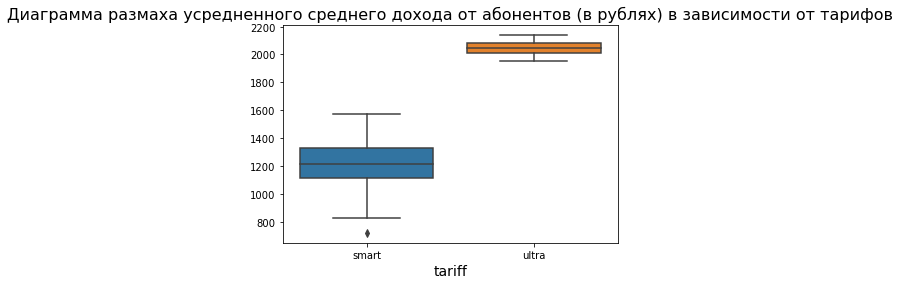

In [12]:
# Строим диаграммы размаха параметров в зависимости от тарифов:
#    звонки:
df_good_stat_c = df_good_stat[['smart_c_mean', 'ultra_c_mean']]
df_good_stat_c.columns = ['smart', 'ultra']
boxplot_с = (sns.boxplot(data=df_good_stat_c)
             .axes.set_title("Диаграмма размаха усредненной средней продолжительности звонков (в минутах) в зависимости от тарифов", fontsize=16)
             .axes.set_xlabel('tariff', fontsize=14)
            )
plt.show()
#    интернет-трафик:
df_good_stat_i = df_good_stat[['smart_i_mean', 'ultra_i_mean']]
df_good_stat_i.columns = ['smart', 'ultra']
boxplot_i = (sns.boxplot(data=df_good_stat_i)
             .axes.set_title("Диаграмма размаха усредненного среднего объема интернет-трафика (в Гб) в зависимости от тарифов", fontsize=16)
             .axes.set_xlabel('tariff', fontsize=14)
            )
plt.show()
#    сообщения:
df_good_stat_m = df_good_stat[['smart_m_mean', 'ultra_m_mean']]
df_good_stat_m.columns = ['smart', 'ultra']
boxplot_i = (sns.boxplot(data=df_good_stat_m)
             .axes.set_title("Диаграмма размаха усредненного среднего количества сообщений (в штуках) в зависимости от тарифов", fontsize=16)
             .axes.set_xlabel('tariff', fontsize=14)
            )
plt.show()
#    доходы:
df_good_stat_p = df_good_stat[['smart_p_mean', 'ultra_p_mean']]
df_good_stat_p.columns = ['smart', 'ultra']
boxplot_i = (sns.boxplot(data=df_good_stat_p)
             .axes.set_title("Диаграмма размаха усредненного среднего дохода от абонентов (в рублях) в зависимости от тарифов", fontsize=16)
             .axes.set_xlabel('tariff', fontsize=14)
            )
plt.show()

Средние значения (mean), дисперсии (var) и стандартные отклонения (std) в зависимости от тарифов для исходных суммарных данных по звонкам:


tariff_name,smart,ultra
mean,419.062978,545.451104
var,35844.189551,94203.418396
std,189.325618,306.925754


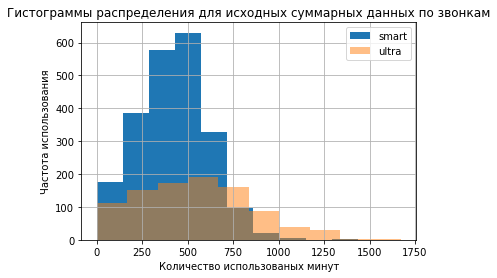

Средние значения (mean), дисперсии (var) и стандартные отклонения (std) в зависимости от тарифов для исходных суммарных данных по интернет-трафику:


tariff_name,smart,ultra
mean,16.336176,19.694359
var,32.923756,94.146734
std,5.737923,9.702924


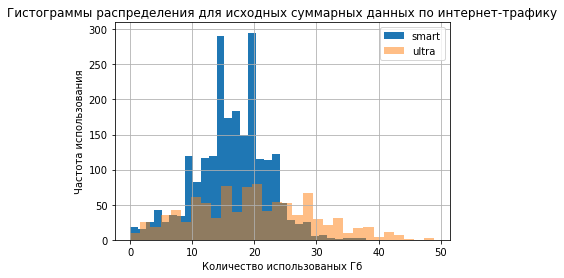

Средние значения (mean), дисперсии (var) и стандартные отклонения (std) в зависимости от тарифов для исходных суммарных данных по сообщениям:


tariff_name,smart,ultra
mean,38.716441,61.161006
var,717.594201,2109.659183
std,26.787949,45.931026


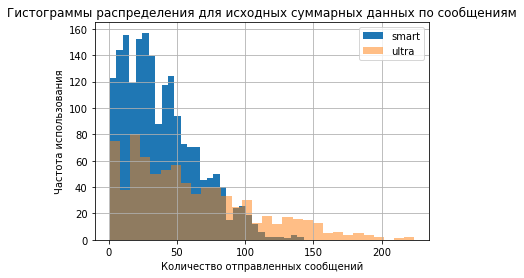

Средние значения (mean), дисперсии (var) и стандартные отклонения (std) в зависимости от тарифов для исходных суммарных данных по доходу:


tariff_name,smart,ultra
mean,1289.641704,2070.030426
var,669730.763895,141387.714809
std,818.370799,376.015578


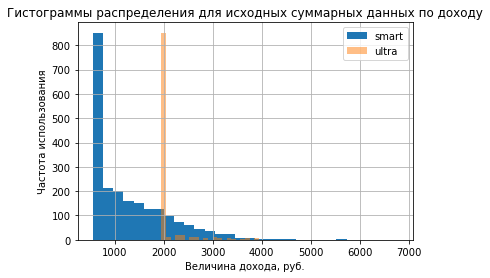

In [13]:
# Вычисляем по исходной информации об абонентах df_good для значений звонков (c), интернет-трафика (i), сообщений (m) и дохода (p)
# средние значения, дисперсии и стандартные отклонения в зависимости от тарифов и строим гистограммы распределения:

#    по звонкам:
calls_da = df_good.groupby('tariff_name').calls_sum_round.agg(['mean','var','std']).T
print('Средние значения (mean), дисперсии (var) и стандартные отклонения (std) в зависимости от тарифов для исходных суммарных данных по звонкам:')
display(calls_da)
df_good.query('tariff_name=="smart"').calls_sum_round.hist(label='smart')
df_good.query('tariff_name=="ultra"').calls_sum_round.hist(label='ultra', alpha=0.5)
plt.title('Гистограммы распределения для исходных суммарных данных по звонкам')
plt.legend()
plt.xlabel("Количество использованых минут")
plt.ylabel("Частота использования")
plt.figsize=(100, 20)
plt.show()

#    по интернет-трафику:
internet_da = df_good.groupby('tariff_name').internet_sum_round.agg(['mean','var','std']).T
print('Средние значения (mean), дисперсии (var) и стандартные отклонения (std) в зависимости от тарифов для исходных суммарных данных по интернет-трафику:')
display(internet_da)
df_good.query('tariff_name=="smart"').internet_sum_round.hist(label='smart', bins=30)
df_good.query('tariff_name=="ultra"').internet_sum_round.hist(label='ultra', alpha=0.5, bins=30)
plt.title('Гистограммы распределения для исходных суммарных данных по интернет-трафику')
plt.legend()
plt.xlabel("Количество использованых Гб")
plt.ylabel("Частота использования")
plt.figsize=(100, 20)
plt.show()

#    по сообщениям:
messages_da = df_good.groupby('tariff_name').messages_count.agg(['mean','var','std']).T
print('Средние значения (mean), дисперсии (var) и стандартные отклонения (std) в зависимости от тарифов для исходных суммарных данных по сообщениям:')
display(messages_da)
df_good.query('tariff_name=="smart"').messages_count.hist(label='smart', bins=30)
df_good.query('tariff_name=="ultra"').messages_count.hist(label='ultra', alpha=0.5, bins=30)
plt.title('Гистограммы распределения для исходных суммарных данных по сообщениям')
plt.legend()
plt.xlabel("Количество отправленных сообщений")
plt.ylabel("Частота использования")
plt.figsize=(100, 20)
plt.show()


#    по доходу:
profit_da = df_good.groupby('tariff_name').profit.agg(['mean','var','std']).T
print('Средние значения (mean), дисперсии (var) и стандартные отклонения (std) в зависимости от тарифов для исходных суммарных данных по доходу:')
display(profit_da)
df_good.query('tariff_name=="smart"').profit.hist(label='smart', bins=30)
df_good.query('tariff_name=="ultra"').profit.hist(label='ultra', alpha=0.5, bins=30)
plt.title('Гистограммы распределения для исходных суммарных данных по доходу')
plt.legend()
plt.xlabel("Величина дохода, руб.")
plt.ylabel("Частота использования")
plt.figsize=(100, 20)
plt.show()

Из полученных таблиц и диаграмм видим, что **усредненные средние значения каждого из параметров - продолжительность звонков, количество интернет-траффика, число отправленных сообщений и величина дохода от абонентов, - для тарифа "ultra" выше, чем для тарифа "smart".**</br>

 **Особенности поведения абонентов:**
- усредненные средние значения **продолжительности звонков в месяц для каждого из тарифов значительно меньше базового пакета**: "smart" 387,6 +/- 72,8 при базе 500 минут; "ultra" 511,2 +/- 84,8 при базе 3000 минут. Другими словами, абоненты тарифа "smart" обычно не используют порядка 100 предоплаченных минут (20% от базы), а абоненты тарифа "ultra" не используют порядка 2500 предоплаченных минут (84% от базы).</br>
- усредненные средние значения **использования интернет-трафика** можно интерпретировать, как то, что абоненты тарифа "smart" часто превышают предоплаченный объем, в то время как абоненты тарифа "ultra" обычно укладываются в предоплаченный лимит ("smart" 15,2 +/- 2,6 при базе 15 Гб; "ultra" 18,5 +/- 2,8 при базе 30 Гб).</br>
- усредненные средние значения **количества отправленных SMS-сообщений для обоих тарифных групп меньше предоплаченных величин, однако абоненты тарифа "smart" более рачительно используют данную услугу, а абоненты тарифа "ultra" почти ею не пользуются** ("smart" 36,3 +/- 6,2 сообщений или 73% от базы в 50 сообщений; "ultra" 55,2 +/- 12,0 сообщений или 6% от базы в 1000 сообщений).</br>

Что касается величин **усредненного среднего дохода от абонентов в связке с размером абонентской платы**, то здесь возможно отметить, что **усредненный средний доход по тарифу "smart" в 2 раза превышает базовую ставку абонентской платы, в то время как для тарифа "ultra" усредненный средний доход чуть больше базовой ставки** ("smart" 1151,95 +/- 228,54 при базе 550 рублей; "ultra" 2046,82 +/- 56,69 при базе 1950 рублей). </br>
Вероятно, такое соотношение по доходам обусловлено частым использованием услуг по повышенным ставкам абонентами "smart" - людям не хватает предоплаченного объема интернет-трафика. Также необходимо учесть, что в исследуемой выборке имеется существенное различие в количестве абонентов по разным тарифам, о котором говорилось ранее.

**Аналогичные выводы можно сделать и по результатам анализа исходных данных (неусредненных по месяцам):**
- **в части звонков** большая часть абонентов тарифа "smart" укладывается в предоплаченные минуты, а абоненты тарифа "ultra" практически полностью покрывают потребность в общении за счет предоплаченного лимита (для "smart" средние величины продолжительности разговоров: 419,1 +/- 189,3 при базе 500 минут; для "ultra" 545,5 +/- 306,9 при базе 3000 минут);</br>
- **в части использования интернет-трафика** около половины абонентов тарифа "smart" используют дополнительный трафик, который оплачивается по более высокой цене, при этом абоненты "ultra" укладываются в предоплаченные гигабайты (для "smart" средние величины размеры трафика: 16,3 +/- 5,7 при базе 15 Гб; "ultra" 19,7 +/- 9,7 при базе 30 Гб). Для абонентов тарифа "smart" отмечаем два пика использования услуги: ~15 и ~20 Гб (возможно, имеет смысл разработать дополнительный тариф 20 Гб);</br>
- **в части отправки сообщений** до трети абонентов тарифа "smart" перебирают предоплаченный лимит, который оплачивается по более высокой цене, при этом абоненты "ultra" полностью укладываются в предоплаченное количество сообщений (для "smart" средние величины сообщений: 38,7 +/- 26,8 при базе в 50 сообщений; "ultra" 61,2 +/- 45,9 сообщений при базе в 1000 сообщений);</br>
- **в части величины среднего дохода** для абонентов тарифа "smart" отмечаем сильно смещенное вправо распределение - то есть много абонентов переплачивают сверх предустановленной ставки базового тарифа, при этом абоненты "ultra" практически полностью укладываются в предоплаченный пакет услуг (для "smart" средние величины дохода: 1289,64 +/- 818,37 при базе в 500 рублей; "ultra" 2070,03 +/- 376,02 при базе в 1950 рублей).

**Из полученных данных также видно, что дополнительно усредненные по месяцам данные (усредненные средние значения параметров) менее точно описывают реальную картину, чем средние значения параметров.**


### Проверка гипотез о средней выручке по тарифам
[В начало](#intro)

Для ответа на основной вопрос исследования - какой из тарифов «Ультра» или «Смарт» приносит больше прибыли для компании сформулируем и проверим соответствующие гипотезы.

Также дадим ответ на вопрос о том, отличаются ли средняя выручка пользователей из Москвы от выручки пользователей из других регионов.

In [14]:
# Суммарный доход и распределение абонентов с тарифами smart и ultra в имеющейся выборке:
p_smart = abon_count.query('tariff_name == "smart"')['profit_user_sum'].sum()
p_ultra = abon_count.query('tariff_name == "ultra"')['profit_user_sum'].sum()
print('Суммарный доход от всех абонентов: ', abon_count['profit_user_sum'].sum(), 'руб. в том числе:')
print(f'- от абонентов с тарифом "smart": {p_smart} руб. ({round((p_smart / (p_smart + p_ultra)) * 100)}%),')
print(f'- от абонентов с тарифом "ultra": {p_ultra} руб. ({100 - round((p_smart / (p_smart + p_ultra)) * 100)}%).')
print(f'Общее количество уникальных абонентов в доступной для анализа выборке: {abon_count_sum} человек, в том числе:')
print(f'- с тарифом "smart": {abon_count_sum_smart} или ~{round((abon_count_sum_smart / abon_count_sum) * 100)}%,')
print(f'- с тарифом "ultra": {abon_count_sum_ultra} или ~{round(100 - (abon_count_sum_smart / abon_count_sum) * 100)}%.') 
print()
# Суммарный доход и распределение абонентов из Москвы и из других регионов:
msk = abon_count.query('city == "Москва"')['profit_user_sum'].sum()
not_msk = abon_count.query('city != "Москва"')['profit_user_sum'].sum()
print('Суммарный доход от всех абонентов: ', abon_count['profit_user_sum'].sum(), 'руб. в том числе:')
print(f'- от абонентов из Москвы: {msk} руб. ({round((msk / (msk + not_msk)) * 100)}%),')
print(f'- от абонентов из других регионов: {not_msk} руб. ({100 - round((msk / (msk + not_msk)) * 100)}%).')
# готовим выборки по среднему доходу от абонентов из Москвы и из других регионов:
profit_msk = abon_count.query('city == "Москва"')['profit_user_mean']
profit_not_msk = abon_count.query('city != "Москва"')['profit_user_mean']
#display(profit_msk)
#display(profit_not_msk)
user_msk = profit_msk.shape[0]
user_not_msk = profit_not_msk.shape[0]
print(f'Общее количество уникальных абонентов в доступной для анализа выборке: {abon_count_sum} человек, в том числе:')
print(f'- абонентов из Москвы: {user_msk} ({round((user_msk / (user_msk + user_not_msk)) * 100)}%),')
print(f'- абонентов из других регионов: {user_not_msk} ({100 - round((user_msk / (user_msk + user_not_msk)) * 100)}%).')

Суммарный доход от всех абонентов:  4916951.0 руб. в том числе:
- от абонентов с тарифом "smart": 2875901.0 руб. (58%),
- от абонентов с тарифом "ultra": 2041050.0 руб. (42%).
Общее количество уникальных абонентов в доступной для анализа выборке: 500 человек, в том числе:
- с тарифом "smart": 351 или ~70%,
- с тарифом "ultra": 149 или ~30%.

Суммарный доход от всех абонентов:  4916951.0 руб. в том числе:
- от абонентов из Москвы: 945042.0 руб. (19%),
- от абонентов из других регионов: 3971909.0 руб. (81%).
Общее количество уникальных абонентов в доступной для анализа выборке: 500 человек, в том числе:
- абонентов из Москвы: 99 (20%),
- абонентов из других регионов: 401 (80%).


#### Гипотеза о средней выручке по тарифам «Ультра» и «Смарт» для всей выборки
[В начало](#intro)

Основываясь на результатах анализа поведения абонентов, сформулируем и проверим соответствующие гипотезы.

**Формулируем нулевую гипотезу H₀:**</br>
**Разницы в средней прибыли от абонентов с тарифами "smart" и "ultra" нет, исследуемые параметры равны.**</br>
То есть **H₀: profit_smart = profit_ultra**.</br>

**Формулируем альтернативную гипотезу H₁:**</br>
**Средняя прибыль от абонентов с тарифом "smart" ниже, чем от абонентов с тарифом "ultra".**</br> 
То есть **H₁: profit_smart < profit_ultra**.</br>
*(односторонняя гипотеза влево: выборочное среднее для profit_smart значимо меньше предполагаемого среднего для profit_ultra)*

**Устанавливаем уровень значимости alfa = 0.05** (пороговый уровень статистической значимости alfa или ошибка первого рода, то есть вероятность ошибочно отклонить нулевую гипотезу составляет 5 из 100).


In [15]:
# Проверяем нулевую гипотезу H₀:
# H₀: profit_smart = profit_ultra
# Фактически мы проверяем гипотезу о равенстве средних двух генеральных совокупностей по взятым из них выборкам.

# готовим выборки по доходу от абонентов тарифа smart и ultra:
profit_smart = df_good.query('tariff_name == "smart"')['profit']
profit_ultra = df_good.query('tariff_name == "ultra"')['profit']
# аналогичный расчет по средним данным о доходах сгруппированных по абонентам таблицах:
# profit_smart = abon_count.query('tariff_name == "smart"')['profit_user_mean']
# profit_ultra = abon_count.query('tariff_name == "ultra"')['profit_user_mean']
# display(profit_smart)
# display(profit_ultra)

# устанавливаем уровень статистической значимости
# (если p-value окажется меньше него - отвергнем гипотезу):
alpha = .05

# проверяем гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам
# с помощью статистического теста с использованием t-распределения: t-теста Стьдента
# (поскольку выборки разного размера и/или можно предположить, что дисперсии у генеральных совокупностей разные, то
# при вызове метода scipy.stats.ttest_ind() указываем equal_var = False):
results = st.ttest_ind(profit_smart, 
                       profit_ultra, 
                       equal_var = False)

# находим p-значение, то есть вероятность получить наблюдаемый или еще более далекий от предполагаемого результат при условии, 
# что нулевая гипотеза верна:
print('p-значение:', results.pvalue / 2) # делим на 2, поскольку альтернативная гипотеза H₁ - односторонняя
print('уровень статистической значимости:', alpha)

if (results.pvalue / 2) < alpha: # делим на 2, поскольку альтернативная гипотеза H₁ - односторонняя
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 9.635056972104705e-251
уровень статистической значимости: 0.05
Отвергаем нулевую гипотезу


После проверки: **нулевая гипотеза H₀ о том, что разницы в средней прибыли от абонентов с тарифами "smart" и "ultra" нет**, и исследуемые параметры равны (H₀: profit_smart = profit_ultra) - **была отвергнута**. Альтернативная гипотеза: для компании «Мегалайн» абоненты тарифа "smart" в среднем приносят меньший доход.

Согласно исходных данных о тарифах, стоимость предоплаченных пакетов услуг или **базовая цена для тарифа "smart" меньше, чем для тарифа "ultra" в 3,55 раза (550 рублей против 1950 рублей).** При этом **имеются отличия между тарифами в стоимости услуг, свыше базового пакета**.

Суммарный доход от всех абонентов:  4 916 951 руб. в том числе:
- от абонентов с тарифом "smart": 2 875 901 руб. (58%),
- от абонентов с тарифом "ultra": 2 041 050 руб. (42%).

**Считая имеющуюся выборку репрезентативной, с учетом полученных результатов исследования возможно признать тариф "smart" как приносящий меньше прибыли, чем тариф "ultra".**

#### Гипотеза о средней выручке по всем тарифам для пользователей из Москвы и для пользователей из других регионов
[В начало](#intro)

Сформулируем соответствующие гипотезы.

**Формулируем нулевую гипотезу H₀:**</br>
**Разницы в средней прибыли от абонентов из Москвы и из других регионов нет, исследуемые параметры равны.**</br>
То есть **H₀: profit_msk = profit_not_msk**.</br>
Фактически мы проверяем гипотезу о равенстве средних двух генеральных совокупностей по взятым из них выборкам.

**Формулируем альтернативную гипотезу H₁:**</br>
**Средняя прибыль от абонентов из Москвы не равна прибыли от абонентов из других регионов.**</br> 
То есть **H₁: profit_msk != profit_not_msk**.</br>
*(двухсторонняя гипотеза)*


**Устанавливаем уровень значимости alfa = 0.05** (пороговый уровень статистической значимости alfa или ошибка первого рода, то есть вероятность ошибочно отклонить нулевую гипотезу составляет 5 из 100).


In [16]:
# Проверяем нулевую гипотезу H₀:
# H₀: profit_msk = profit_not_msk

# готовим выборки по доходу от абонентов из столицы и из регионов:
profit_da_msk = df_good.query('city == "Москва"')['profit']
profit_da_not_msk = df_good.query('city != "Москва"')['profit']
print('Средняя прибыль от абонента из Москвы:', round(profit_da_msk.mean()),'руб.')
print('Средняя прибыль от абонента из других регионов:', round(profit_da_not_msk.mean()),'руб.')
print()
# аналогичный расчет по средним данным о доходах сгруппированных по абонентам таблицах:
# profit_smart = abon_count.query('tariff_name == "smart"')['profit_user_mean']
# profit_ultra = abon_count.query('tariff_name == "ultra"')['profit_user_mean']
# display(profit_smart)
# display(profit_ultra)

# устанавливаем уровень статистической значимости
# (если p-value окажется меньше него - отвергнем гипотезу):
alpha = .05

# проверяем гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам
# с помощью статистического теста с использованием t-распределения: t-теста Стьдента
# (поскольку выборки разного размера и/или можно предположить, что дисперсии у генеральных совокупностей разные, то
# при вызове метода scipy.stats.ttest_ind() указываем equal_var = False):
results = st.ttest_ind(profit_da_msk, 
                       profit_da_not_msk, 
                       equal_var = False)

# находим p-значение, то есть вероятность получить наблюдаемый или еще более далекий от предполагаемого результат при условии, 
# что нулевая гипотеза верна:
print('p-значение:', results.pvalue)
print('уровень статистической значимости:', alpha)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


Средняя прибыль от абонента из Москвы: 1547 руб.
Средняя прибыль от абонента из других регионов: 1525 руб.

p-значение: 0.5216952110000279
уровень статистической значимости: 0.05
Не получилось отвергнуть нулевую гипотезу


Суммарный доход от всех абонентов:  4 916 951 руб. в том числе:
- от абонентов из Москвы: 945 042 руб. (19%),
- от абонентов из других регионов: 3 971 909 руб. (81%).

После проверки: **нулевая гипотеза H₀ о том, что разницы в средней прибыли от абонентов в Москве и других регионах нет, и исследуемые параметры равны (H₀: profit_msk = profit_not_msk) - не была отвергнута**.
Другими словами по имеющейся выборке с вероятностью 5% возможно считать, что в среднем абоненты из столицы и из регионов приносят одинаковую прибыль.

## Общий вывод
[В начало](#intro)

**ЧТО СДЕЛАНО НА ЭТАПЕ ПРЕДОБРАБОТКИ ДАННЫХ**</br>

Исходные датафреймы представляют собой таблицы:</br>
- информация о звонках (calls): из 4 столбцов и 202607 строк;</br>
- информация об интернет-сессиях (internet): из 5 столбцов и 149396 строк;</br>
- информация о сообщениях (messages): из 3 столбцов и 123036 строк;</br>
- информация о тарифах (tariffs): из 8 столбцов и 2 строк;</br>
- информация об абонентах (users): из 8 столбцов и 500 строк (считая нулевую).</br> 
В столбцах используются значения различных типов (строки, вещественные и целые числа).</br>
Для ряда значений автоматически определенный тип неверен (например, даты должны быть в формате дата/время, а не строками).
В таблице с информацией об абонентах имеется столбец "churn_date" (дата прекращения пользования тарифом) с пропусками данных.</br>
Явных дубликатов в данных не обнаружено.</br>
Для удобства часть столбцов были переименованы. Из описания данных для таблицы users (информация о пользователях) следует, что если значение столбца churn_date (дата прекращения пользования тарифом) пропущено, то тариф ещё действовал на момент выгрузки данных. Поскольку предоставлены данные за 2018 год, то заменяем все пропущенные значения на 31.12.2018. Доля пропущенных значений о смене тарифа среди всех данных таблицы users 92.4%. Количество абонентов, сменивших тарифный план в 2018 году: 38.
Оценивая автоматически определенные типы данных в столбцах таблиц, заключаем, что типы во всех случаях, за исключением дат, определены верно. Заменили типы данных в столбцах с датами с object на datetime64.</br>
Посчитали для каждого пользователя:
• количество сделанных звонков и израсходованных минут разговора по месяцам;
• объем израсходованного интернет-траффика по месяцам;
• количество отправленных сообщений по месяцам;
• помесячную выручку с каждого пользователя.

Для двух абонентов месяц не указан, поскольку в этом же месяце (декабре) была совершена смена тарифа. Несмотря на отсутствие звонков, пользования интернетом или отправки сообщений, считаем, что для этих абонентов взималась плата базового тарифа за один месяц.</br>
Всего после обработки сводная таблица содержит: 3216 строк и 9 столбцов.
</br>
</br>
</br>


**ИТОГИ ИССЛЕДОВАНИЯ - ОТВЕТЫ НА ПОСТАВЛЕННЫЕ ВОПРОСЫ**

**Анализ поведения абонентов**</br>

Из полученных таблиц и диаграмм заключаем, что **с каждым месяцем продолжительность звонков, количество интернет-траффика и число отправленных сообщений для обоих рассматриваемых тарифов растет.**</br>
В начале года продолжительность звонков, объем интернет-траффика и количество отправленных сообщений по тарифу "smart" были более чем в 2 раза больше, чем по тарифу "ultra". В весенние и летние месяцы превышение объемов тарифа "smart" над тарифом "ultra" несколько выровнялось (в июне соотношения параметров были в коридоре 1,50...1,75). Осенью и зимой это соотношение по звонкам и интернету стабилизировались возле 2, в то время как сообщения абоненты тарифа "smart" стали отправлять реже, чем в предыдущие месяцы (соотношение "smart" / "ultra" чуть ниже 1,5).</br>  
**Прибыль от абонентов тарифа "smart" практически на протяжении всего года была больше, чем от абонентов тарифа "ultra"**, за исключением февраля (практически одинаковые значения) и апреля, когда абоненты тарифа "ultra" принесли больше дохода компании.</br>  
**С мая и по декабрь заметна тенденция устойчивого опережения роста прибыли от абонентов тарифа "smart" над прибылью от абонентов тарифа "ultra".** Тем не менее, **делать на данном этапе вывод, что тариф "smart" прибыльнее для компании нельзя, поскольку общее количество уникальных абонентов в доступной для анализа выборке (500 человек) распределено по тарифам неравномерно**.</br>
Также заключаем, что **средние значения каждого из параметров - продолжительность звонков, количество интернет-траффика, число отправленных сообщений и величина дохода от абонентов, - для тарифа "ultra" выше, чем для тарифа "smart".**</br>

 Из полученных таблиц и диаграмм видим, что **усредненные средние значения каждого из параметров - продолжительность звонков, количество интернет-траффика, число отправленных сообщений и величина дохода от абонентов, - для тарифа "ultra" выше, чем для тарифа "smart".**</br>

 **Особенности поведения абонентов:**
- усредненные средние значения **продолжительности звонков в месяц для каждого из тарифов значительно меньше базового пакета**: "smart" 387,6 +/- 72,8 при базе 500 минут; "ultra" 511,2 +/- 84,8 при базе 3000 минут. Другими словами, абоненты тарифа "smart" обычно не используют порядка 100 предоплаченных минут (20% от базы), а абоненты тарифа "ultra" не используют порядка 2500 предоплаченных минут (84% от базы).</br>
- усредненные средние значения **использования интернет-трафика** можно интерпретировать, как то, что абоненты тарифа "smart" часто превышают предоплаченный объем, в то время как абоненты тарифа "ultra" обычно укладываются в предоплаченный лимит ("smart" 15,2 +/- 2,6 при базе 15 Гб; "ultra" 18,5 +/- 2,8 при базе 30 Гб).</br>
- усредненные средние значения **количества отправленных SMS-сообщений для обоих тарифных групп меньше предоплаченных величин, однако абоненты тарифа "smart" более рачительно используют данную услугу, а абоненты тарифа "ultra" почти ею не пользуются** ("smart" 36,3 +/- 6,2 сообщений или 73% от базы в 50 сообщений; "ultra" 55,2 +/- 12,0 сообщений или 6% от базы в 1000 сообщений).</br>

Что касается величин **усредненного среднего дохода от абонентов в связке с размером абонентской платы**, то здесь возможно отметить, что **усредненный средний доход по тарифу "smart" в 2 раза превышает базовую ставку абонентской платы, в то время как для тарифа "ultra" усредненный средний доход чуть больше базовой ставки** ("smart" 1151,95 +/- 228,54 при базе 550 рублей; "ultra" 2046,82 +/- 56,69 при базе 1950 рублей). </br>
Вероятно, такое соотношение по доходам обусловлено частым использованием услуг по повышенным ставкам абонентами "smart" - людям не хватает предоплаченного объема интернет-трафика. Также необходимо учесть, что в исследуемой выборке имеется существенное различие в количестве абонентов по разным тарифам, о котором говорилось ранее.

**Аналогичные выводы можно сделать и по результатам анализа исходных данных (неусредненных по месяцам):**
- **в части звонков** большая часть абонентов тарифа "smart" укладывается в предоплаченные минуты, а абоненты тарифа "ultra" практически полностью покрывают потребность в общении за счет предоплаченного лимита (для "smart" средние величины продолжительности разговоров: 419,1 +/- 189,3 при базе 500 минут; для "ultra" 545,5 +/- 306,9 при базе 3000 минут);</br>
- **в части использования интернет-трафика** около половины абонентов тарифа "smart" используют дополнительный трафик, который оплачивается по более высокой цене, при этом абоненты "ultra" укладываются в предоплаченные гигабайты (для "smart" средние величины размеры трафика: 16,3 +/- 5,7 при базе 15 Гб; "ultra" 19,7 +/- 9,7 при базе 30 Гб). Для абонентов тарифа "smart" отмечаем два пика использования услуги: ~15 и ~20 Гб (возможно, имеет смысл разработать дополнительный тариф 20 Гб);</br>
- **в части отправки сообщений** до трети абонентов тарифа "smart" перебирают предоплаченный лимит, который оплачивается по более высокой цене, при этом абоненты "ultra" полностью укладываются в предоплаченное количество сообщений (для "smart" средние величины сообщений: 38,7 +/- 26,8 при базе в 50 сообщений; "ultra" 61,2 +/- 45,9 сообщений при базе в 1000 сообщений);</br>
- **в части величины среднего дохода** для абонентов тарифа "smart" отмечаем сильно смещенное вправо распределение - то есть много абонентов переплачивают сверх предустановленной ставки базового тарифа, при этом абоненты "ultra" практически полностью укладываются в предоплаченный пакет услуг (для "smart" средние величины дохода: 1289,64 +/- 818,37 при базе в 500 рублей; "ultra" 2070,03 +/- 376,02 при базе в 1950 рублей).

**Из полученных данных также видно, что дополнительно усредненные по месяцам данные (усредненные средние значения параметров) менее точно описывают реальную картину, чем средние значения параметров.**


Согласно исходных данных о тарифах, стоимость предоплаченных пакетов услуг или **базовая цена для тарифа "smart" меньше, чем для тарифа "ultra" в 3,55 раза (550 рублей против 1950 рублей).** При этом **имеются отличия между тарифами в стоимости услуг, свыше базового пакета**.

Суммарный доход от всех абонентов:  **4 916 951 руб.** в том числе:
- от абонентов с тарифом "smart": 2 875 901 руб. (58%),
- от абонентов с тарифом "ultra": 2 041 050 руб. (42%),
- от абонентов из Москвы: 945 042 руб. (19%),
- от абонентов из других регионов: 3 971 909 руб. (81%).

Общее количество уникальных абонентов в доступной для анализа выборке: **500 человек**, в том числе:
- с тарифом "smart": 351 или ~70%,
- с тарифом "ultra": 149 или ~30%,
- абонентов из Москвы: 99 (20%),
- абонентов из других регионов: 401 (80%).


**Проверка гипотез:**</br>

По вопросу № 1 о более выгодном тарифе из рассматриваемых.</br>

**Нулевая гипотеза о том, что средняя прибыль от абонентов сравниваемых тарифов одинаковая - отвергнута**.</br>
Альтернативная гипотеза: для компании «Мегалайн» абоненты тарифа "smart" в среднем приносят меньший доход.

По вопросу № 2 о разнице в прибыльности столицы и регионов.</br>

После проверки **нулевая гипотеза о том, что разницы в средней прибыли от абонентов в Москве и других регионах нет**, и исследуемые параметры равны **не была отвергнута**.</br>
Альтернативная гипотеза: средняя прибыль от абонентов в Москве не равна средней прибыли от абонентов в других регионах.
</br>
</br>

**ВЫВОД ПО ИССЛЕДОВАНИЮ**

**Считая имеющуюся выборку репрезентативной, с учетом полученных результатов исследования возможно признать, что в среднем тариф "smart" приносит меньше прибыли, чем тариф "ultra".**</br>

**На основе имеющейся выборки разница в средней прибыльности от абонентов из столицы и из регионов не обнаружена.**
